In [1]:
import pandas as pd
import re
import seaborn as sns

In [2]:
df = pd.read_csv('raw_email.csv')

In [3]:
df

From  \
0              Typology Paris <no-reply@typology.com>   
1       LinkedIn <notifications-noreply@linkedin.com>   
2              Typology Paris <no-reply@typology.com>   
3    France travail <Service-candidat@pole-emploi.fr>   
4              Typology Paris <no-reply@typology.com>   
..                                                ...   
429                "'GLS-France'" <uMLdooGT@rumzg.fr>   
430   "ᴛᴇɴᴛᴀᴛɪᴠᴇ ᴅᴇ ʟɪᴠʀᴀɪsᴏɴ" <iiEdXqjW@iiedxqjw.us>   
431      chrono-poste-express <MfKqNMmy@gdnoclslu.us>   
432   "Emma de Gsm55.com" <emma@newsletter.gsm55.com>   
433      chrono-poste-express <aaQrLJij@orgvihhcl.us>   

                                               Subject  \
0                     Votre prescription personnalisée   
1                   Vous apparaissez dans 9 recherches   
2                         Votre prescription est prête   
3    Vous avez reçu un courrier " Relevé de situati...   
4    Typologie AE(-) : Ce qu’ils pensent de nos pro...   
..                                                 ...   
429  melanie.picot01: 📦 Commande en attente (1). Vo...   
430  ᴍɪsᴇ ᴀ̀ ᴊᴏᴜʀ ᴅᴇ ʟᴀ ʟɪᴠʀᴀɪsᴏɴ : ᴠᴏᴛʀᴇ ʟɪᴠʀᴀɪsᴏɴ...   
431  melanie.picot01, Vous avez (1) message de notr...   
432                    🌞 Soldes sur notre TOP de l'été   
433  melanie.picot01, Vous avez (1) message de notr...   

                                               Snippet  \
0    Découvrez vos résultats ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ...   
1    Des personnes recherchent vos compétences ͏ ͏ ...   
2    Découvrez votre routine personnalisée ͏ ͏ ͏ ͏ ...   
3    France Travail Candidat Bonjour, Vous avez reç...   
4    Leurs avis valent toutes les recommandations. ...   
..                                                 ...   
429  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...   
430  GLS. Bonjour melanie.picot01, Vous avez (1) co...   
431  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...   
432  Coques cordons, étuis waterproof, powerbank, a...   
433  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...   

                                                Labels  Has Attachments  \
0              ['UNREAD', 'CATEGORY_UPDATES', 'INBOX']             True   
1               ['UNREAD', 'CATEGORY_SOCIAL', 'INBOX']             True   
2    ['UNREAD', 'IMPORTANT', 'CATEGORY_UPDATES', 'I...             True   
3                        ['CATEGORY_UPDATES', 'INBOX']            False   
4           ['CATEGORY_PROMOTIONS', 'UNREAD', 'INBOX']             True   
..                                                 ...              ...   
429            ['UNREAD', 'CATEGORY_PERSONAL', 'SPAM']            False   
430            ['UNREAD', 'CATEGORY_PERSONAL', 'SPAM']             True   
431            ['UNREAD', 'CATEGORY_PERSONAL', 'SPAM']            False   
432          ['CATEGORY_PROMOTIONS', 'UNREAD', 'SPAM']             True   
433            ['UNREAD', 'CATEGORY_PERSONAL', 'SPAM']            False   

     Message Length  
0             38172  
1             30467  
2             36211  
3              6846  
4             41375  
..              ...  
429           28050  
430           25732  
431           26103  
432           97254  
433           27911  

[434 rows x 6 columns]

## Expediteur

In [5]:
df['From'] = df['From'].str.split(" ").str[-1]

In [6]:
df['From_Username'] = df['From'].str.split('@').str[0].str.replace('<','')

In [7]:
df['From_Domain'] = df['From'].str.split('@').str[1].str.split('.').str[0]

In [8]:
df = df.drop('From', axis=1)

In [9]:
df

Subject  \
0                     Votre prescription personnalisée   
1                   Vous apparaissez dans 9 recherches   
2                         Votre prescription est prête   
3    Vous avez reçu un courrier " Relevé de situati...   
4    Typologie AE(-) : Ce qu’ils pensent de nos pro...   
..                                                 ...   
429  melanie.picot01: 📦 Commande en attente (1). Vo...   
430  ᴍɪsᴇ ᴀ̀ ᴊᴏᴜʀ ᴅᴇ ʟᴀ ʟɪᴠʀᴀɪsᴏɴ : ᴠᴏᴛʀᴇ ʟɪᴠʀᴀɪsᴏɴ...   
431  melanie.picot01, Vous avez (1) message de notr...   
432                    🌞 Soldes sur notre TOP de l'été   
433  melanie.picot01, Vous avez (1) message de notr...   

                                               Snippet  \
0    Découvrez vos résultats ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ...   
1    Des personnes recherchent vos compétences ͏ ͏ ...   
2    Découvrez votre routine personnalisée ͏ ͏ ͏ ͏ ...   
3    France Travail Candidat Bonjour, Vous avez reç...   
4    Leurs avis valent toutes les recommandations. ...   
..                                                 ...   
429  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...   
430  GLS. Bonjour melanie.picot01, Vous avez (1) co...   
431  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...   
432  Coques cordons, étuis waterproof, powerbank, a...   
433  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...   

                                                Labels  Has Attachments  \
0              ['UNREAD', 'CATEGORY_UPDATES', 'INBOX']             True   
1               ['UNREAD', 'CATEGORY_SOCIAL', 'INBOX']             True   
2    ['UNREAD', 'IMPORTANT', 'CATEGORY_UPDATES', 'I...             True   
3                        ['CATEGORY_UPDATES', 'INBOX']            False   
4           ['CATEGORY_PROMOTIONS', 'UNREAD', 'INBOX']             True   
..                                                 ...              ...   
429            ['UNREAD', 'CATEGORY_PERSONAL', 'SPAM']            False   
430            ['UNREAD', 'CATEGORY_PERSONAL', 'SPAM']             True   
431            ['UNREAD', 'CATEGORY_PERSONAL', 'SPAM']            False   
432          ['CATEGORY_PROMOTIONS', 'UNREAD', 'SPAM']             True   
433            ['UNREAD', 'CATEGORY_PERSONAL', 'SPAM']            False   

     Message Length          From_Username  From_Domain  
0             38172               no-reply     typology  
1             30467  notifications-noreply     linkedin  
2             36211               no-reply     typology  
3              6846       Service-candidat  pole-emploi  
4             41375               no-reply     typology  
..              ...                    ...          ...  
429           28050               uMLdooGT        rumzg  
430           25732               iiEdXqjW     iiedxqjw  
431           26103               MfKqNMmy    gdnoclslu  
432           97254                   emma   newsletter  
433           27911               aaQrLJij    orgvihhcl  

[434 rows x 7 columns]

In [10]:
def count_upper_case(text):
    upper_case = re.findall(r'[A-Z]', text)
    return len(upper_case)

In [11]:
df['count_upper_username'] = df['From_Username'].apply(count_upper_case)

## Labels

In [13]:
df['Labels'] = df.Labels.str[-3]

In [14]:
#spam = 1, inbox=0
df['Labels'] = df['Labels'].map({'X':0, 'M':1})
df['Has Attachments'] = df['Has Attachments'].map({True:1, False:0})

In [15]:
df

Subject  \
0                     Votre prescription personnalisée   
1                   Vous apparaissez dans 9 recherches   
2                         Votre prescription est prête   
3    Vous avez reçu un courrier " Relevé de situati...   
4    Typologie AE(-) : Ce qu’ils pensent de nos pro...   
..                                                 ...   
429  melanie.picot01: 📦 Commande en attente (1). Vo...   
430  ᴍɪsᴇ ᴀ̀ ᴊᴏᴜʀ ᴅᴇ ʟᴀ ʟɪᴠʀᴀɪsᴏɴ : ᴠᴏᴛʀᴇ ʟɪᴠʀᴀɪsᴏɴ...   
431  melanie.picot01, Vous avez (1) message de notr...   
432                    🌞 Soldes sur notre TOP de l'été   
433  melanie.picot01, Vous avez (1) message de notr...   

                                               Snippet  Labels  \
0    Découvrez vos résultats ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ...       0   
1    Des personnes recherchent vos compétences ͏ ͏ ...       0   
2    Découvrez votre routine personnalisée ͏ ͏ ͏ ͏ ...       0   
3    France Travail Candidat Bonjour, Vous avez reç...       0   
4    Leurs avis valent toutes les recommandations. ...       0   
..                                                 ...     ...   
429  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...       1   
430  GLS. Bonjour melanie.picot01, Vous avez (1) co...       1   
431  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...       1   
432  Coques cordons, étuis waterproof, powerbank, a...       1   
433  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...       1   

     Has Attachments  Message Length          From_Username  From_Domain  \
0                  1           38172               no-reply     typology   
1                  1           30467  notifications-noreply     linkedin   
2                  1           36211               no-reply     typology   
3                  0            6846       Service-candidat  pole-emploi   
4                  1           41375               no-reply     typology   
..               ...             ...                    ...          ...   
429                0           28050               uMLdooGT        rumzg   
430                1           25732               iiEdXqjW     iiedxqjw   
431                0           26103               MfKqNMmy    gdnoclslu   
432                1           97254                   emma   newsletter   
433                0           27911               aaQrLJij    orgvihhcl   

     count_upper_username  
0                       0  
1                       0  
2                       0  
3                       1  
4                       0  
..                    ...  
429                     4  
430                     3  
431                     4  
432                     0  
433                     3  

[434 rows x 8 columns]

## Subject, Snippet and From_Username

In [17]:
df['Subject'] = df['Subject'].str.lower()
df['Snippet'] = df['Snippet'].str.lower()
df['From_Username'] = df['From_Username'].str.lower()
df['From_Domain'] = df['From_Domain'].str.lower()

In [18]:
df.dropna(subset=['Subject', 'Snippet', 'From_Username', 'From_Domain'], inplace=True)

In [19]:
def count_special_characters(text):
    special_characters = re.findall(r'[^a-zA-Z0-9\s]', text)
    return len(special_characters)

In [20]:
df['Special_Char_Count_Subject'] = df['Subject'].apply(count_special_characters)
df['Special_Char_Count_Snippet'] = df['Snippet'].apply(count_special_characters)

In [21]:
df['Subject_Length'] = df['Subject'].apply(len)
df['Snippet_Length'] = df['Snippet'].apply(len)

In [22]:
df = df.reset_index(drop=True)

In [23]:
df

Subject  \
0                     votre prescription personnalisée   
1                   vous apparaissez dans 9 recherches   
2                         votre prescription est prête   
3    vous avez reçu un courrier " relevé de situati...   
4    typologie ae(-) : ce qu’ils pensent de nos pro...   
..                                                 ...   
418  melanie.picot01: 📦 commande en attente (1). vo...   
419  ᴍɪsᴇ ᴀ̀ ᴊᴏᴜʀ ᴅᴇ ʟᴀ ʟɪᴠʀᴀɪsᴏɴ : ᴠᴏᴛʀᴇ ʟɪᴠʀᴀɪsᴏɴ...   
420  melanie.picot01, vous avez (1) message de notr...   
421                    🌞 soldes sur notre top de l'été   
422  melanie.picot01, vous avez (1) message de notr...   

                                               Snippet  Labels  \
0    découvrez vos résultats ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ...       0   
1    des personnes recherchent vos compétences ͏ ͏ ...       0   
2    découvrez votre routine personnalisée ͏ ͏ ͏ ͏ ...       0   
3    france travail candidat bonjour, vous avez reç...       0   
4    leurs avis valent toutes les recommandations. ...       0   
..                                                 ...     ...   
418  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...       1   
419  gls. bonjour melanie.picot01, vous avez (1) co...       1   
420  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...       1   
421  coques cordons, étuis waterproof, powerbank, a...       1   
422  𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...       1   

     Has Attachments  Message Length          From_Username  From_Domain  \
0                  1           38172               no-reply     typology   
1                  1           30467  notifications-noreply     linkedin   
2                  1           36211               no-reply     typology   
3                  0            6846       service-candidat  pole-emploi   
4                  1           41375               no-reply     typology   
..               ...             ...                    ...          ...   
418                0           28050               umldoogt        rumzg   
419                1           25732               iiedxqjw     iiedxqjw   
420                0           26103               mfkqnmmy    gdnoclslu   
421                1           97254                   emma   newsletter   
422                0           27911               aaqrljij    orgvihhcl   

     count_upper_username  Special_Char_Count_Subject  \
0                       0                           1   
1                       0                           0   
2                       0                           1   
3                       1                           5   
4                       0                           5   
..                    ...                         ...   
418                     4                          13   
419                     3                          47   
420                     4                           4   
421                     0                           4   
422                     3                           4   

     Special_Char_Count_Snippet  Subject_Length  Snippet_Length  
0                            91              32             201  
1                            81              34             201  
2                            84              28             201  
3                            15              85             201  
4                            79              51             201  
..                          ...             ...             ...  
418                         131              92             196  
419                          13              63             196  
420                          57              52             194  
421                          19              31             199  
422                          57              52             194  

[423 rows x 12 columns]

In [24]:
## StopWords

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
words_subject=df['Subject']
words_snippet = df['Snippet']
words_subject = words_subject.apply(word_tokenize)
words_snippet = words_snippet.apply(word_tokenize)

In [28]:
words_subject

0                   [votre, prescription, personnalisée]
1               [vous, apparaissez, dans, 9, recherches]
2                      [votre, prescription, est, prête]
3      [vous, avez, reçu, un, courrier, ``, relevé, d...
4      [typologie, ae, (, -, ), :, ce, qu, ’, ils, pe...
                             ...                        
418    [melanie.picot01, :, 📦, commande, en, attente,...
419    [ᴍɪsᴇ, ᴀ̀, ᴊᴏᴜʀ, ᴅᴇ, ʟᴀ, ʟɪᴠʀᴀɪsᴏɴ, :, ᴠᴏᴛʀᴇ, ...
420    [melanie.picot01, ,, vous, avez, (, 1, ), mess...
421              [🌞, soldes, sur, notre, top, de, l'été]
422    [melanie.picot01, ,, vous, avez, (, 1, ), mess...
Name: Subject, Length: 423, dtype: object

In [29]:
stop_words = set(stopwords.words('french'))

In [30]:
def filter_stop_words(words, stop_words):
    filtered_words = []
    for word in words : 
        if word not in stop_words : 
            filtered_words.append(word)
    return filtered_words
    

In [31]:
df['Subject_filtered'] = words_subject.apply(lambda x : filter_stop_words(x, stop_words))

In [32]:
df['Snippet_filtered'] = words_snippet.apply(lambda x : filter_stop_words(x, stop_words))

In [33]:
df['Snippet_filtered']

0      [découvrez, résultats, ͏, ͏, ͏, ͏, ͏, ͏, ͏, ͏,...
1      [personnes, recherchent, compétences, ͏, ͏, ͏,...
2      [découvrez, routine, personnalisée, ͏, ͏, ͏, ͏...
3      [france, travail, candidat, bonjour, ,, reçu, ...
4      [leurs, avis, valent, toutes, recommandations,...
                             ...                        
418    [𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻, 𝗱𝗲, 𝘀𝘂𝗶𝘃𝗶, 𝗱𝗲, 𝗹𝗮, 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻, 𝗱...
419    [gls, ., bonjour, melanie.picot01, ,, (, 1, ),...
420    [𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻, 𝗱𝗲, 𝘀𝘂𝗶𝘃𝗶, 𝗱𝗲, 𝗹𝗮, 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻, 𝗱...
421    [coques, cordons, ,, étuis, waterproof, ,, pow...
422    [𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻, 𝗱𝗲, 𝘀𝘂𝗶𝘃𝗶, 𝗱𝗲, 𝗹𝗮, 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻, 𝗱...
Name: Snippet_filtered, Length: 423, dtype: object

In [34]:
# transformer en une suite de mot plutot qu'a une liste (pour TF-IDF) : join ?
df['Snippet_filtered'] = df['Snippet_filtered'].apply(lambda x : ' '.join(x))
df['Subject_filtered'] = df['Subject_filtered'].apply(lambda x : ' '.join(x))

In [35]:
df['Snippet_filtered']

0      découvrez résultats ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ...
1      personnes recherchent compétences ͏ ͏ ͏ ͏ ͏ ͏ ...
2      découvrez routine personnalisée ͏ ͏ ͏ ͏ ͏ ͏ ͏ ...
3      france travail candidat bonjour , reçu courrie...
4      leurs avis valent toutes recommandations . ͏ ͏...
                             ...                        
418    𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...
419    gls . bonjour melanie.picot01 , ( 1 ) colis at...
420    𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...
421    coques cordons , étuis waterproof , powerbank ...
422    𝗡𝗼𝘁𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗱𝗲 𝘀𝘂𝗶𝘃𝗶 𝗱𝗲 𝗹𝗮 𝗹𝗶𝘃𝗿𝗮𝗶𝘀𝗼𝗻 𝗱𝗲 𝘃𝗼𝘁𝗿𝗲...
Name: Snippet_filtered, Length: 423, dtype: object

## TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorizer = TfidfVectorizer()

In [39]:
X_subject = vectorizer.fit_transform(df['Subject_filtered'])
X_snippet = vectorizer.fit_transform(df['Snippet_filtered'])

In [40]:
# ce sont des "matrices sparces" : contiennent des vecteurs avec bcp de 0. On peut les combiner avec feature : 1:Tranfo feature en matrice sparce, 2:transfo vecteurs en matrice dense

In [41]:
df_subject = pd.DataFrame(X_subject.toarray())
df_snippet = pd.DataFrame(X_snippet.toarray())

In [42]:
## df final

In [43]:
df_features = df[['Has Attachments', 'Message Length', 'count_upper_username', 'Special_Char_Count_Subject', 'Special_Char_Count_Snippet', 'Subject_Length', 'Snippet_Length' ,'Labels']]

In [44]:
df_features

Has Attachments  Message Length  count_upper_username  \
0                  1           38172                     0   
1                  1           30467                     0   
2                  1           36211                     0   
3                  0            6846                     1   
4                  1           41375                     0   
..               ...             ...                   ...   
418                0           28050                     4   
419                1           25732                     3   
420                0           26103                     4   
421                1           97254                     0   
422                0           27911                     3   

     Special_Char_Count_Subject  Special_Char_Count_Snippet  Subject_Length  \
0                             1                          91              32   
1                             0                          81              34   
2                             1                          84              28   
3                             5                          15              85   
4                             5                          79              51   
..                          ...                         ...             ...   
418                          13                         131              92   
419                          47                          13              63   
420                           4                          57              52   
421                           4                          19              31   
422                           4                          57              52   

     Snippet_Length  Labels  
0               201       0  
1               201       0  
2               201       0  
3               201       0  
4               201       0  
..              ...     ...  
418             196       1  
419             196       1  
420             194       1  
421             199       1  
422             194       1  

[423 rows x 8 columns]

In [45]:
# Combinaison vector/feature

In [46]:
df_combined = pd.concat([df_subject, df_snippet, df_features], axis=1)

In [47]:
df_combined

0    1    2    3    4    5    6    7    8    9  ...      1967  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
418  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.184056   
419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
420  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
421  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

         1968  Has Attachments  Message Length  count_upper_username  \
0    0.000000                1           38172                     0   
1    0.000000                1           30467                     0   
2    0.000000                1           36211                     0   
3    0.000000                0            6846                     1   
4    0.000000                1           41375                     0   
..        ...              ...             ...                   ...   
418  0.184056                0           28050                     4   
419  0.000000                1           25732                     3   
420  0.000000                0           26103                     4   
421  0.000000                1           97254                     0   
422  0.000000                0           27911                     3   

     Special_Char_Count_Subject  Special_Char_Count_Snippet  Subject_Length  \
0                             1                          91              32   
1                             0                          81              34   
2                             1                          84              28   
3                             5                          15              85   
4                             5                          79              51   
..                          ...                         ...             ...   
418                          13                         131              92   
419                          47                          13              63   
420                           4                          57              52   
421                           4                          19              31   
422                           4                          57              52   

     Snippet_Length  Labels  
0               201       0  
1               201       0  
2               201       0  
3               201       0  
4               201       0  
..              ...     ...  
418             196       1  
419             196       1  
420             194       1  
421             199       1  
422             194       1  

[423 rows x 2844 columns]

In [48]:
df_combined.columns = df_combined.columns.astype(str)

In [49]:
#train_test_split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df_combined.drop('Labels', axis=1)
y = df_combined['Labels']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [130]:
X_train

0    1    2    3    4    5    6    7    8    9  ...  1966  1967  1968  \
33   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
113  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
401  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
148  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
283  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
71   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
106  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
270  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
348  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
102  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

     Has Attachments  Message Length  count_upper_username  \
33                 1            4870                     0   
113                1            2378                     0   
401                0           27911                     5   
148                1          159975                     0   
283                1           31102                     0   
..               ...             ...                   ...   
71                 0            3234                     0   
106                1           58545                     0   
270                1           11997                     0   
348                1           12453                     0   
102                1          155520                     0   

     Special_Char_Count_Subject  Special_Char_Count_Snippet  Subject_Length  \
33                            6                           9              59   
113                           1                          13              27   
401                           4                          57              52   
148                           5                          78             101   
283                           1                           9              25   
..                          ...                         ...             ...   
71                            5                          15              74   
106                           4                          12              65   
270                           6                          16              58   
348                           2                          14              31   
102                          11                          56              94   

     Snippet_Length  
33              201  
113             201  
401             194  
148             200  
283             200  
..              ...  
71              198  
106             198  
270             201  
348             201  
102             201  

[380 rows x 2843 columns]

In [53]:
#Scaling

In [166]:
#plus approprié que StandartScaler, car valeur comprises entre 0 et 1 (MNB, n'accepte pas les negatif)
from sklearn.preprocessing import MinMaxScaler

In [140]:
columns_to_scale=['Message Length','count_upper_username','Special_Char_Count_Subject','Special_Char_Count_Snippet','Subject_Length','Snippet_Length']

In [144]:
X_train_to_scale = X_train[columns_to_scale]
X_train_others = X_train.drop(columns_to_scale, axis=1)

In [170]:
scaler = MinMaxScaler()

In [172]:
X_train_scaled = scaler.fit_transform(X_train_to_scale)

In [174]:
X_test_to_scale = X_test[columns_to_scale]

In [176]:
X_test_scaled = scaler.transform(X_test_to_scale)

In [178]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test.index)

In [180]:
X_train_combined = pd.concat([X_train_scaled_df, X_train_others], axis=1)
X_test_combined = pd.concat([X_test_scaled_df, X_test.drop(columns_to_scale, axis=1)], axis=1)

## entrainement

In [193]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [203]:
param_grid={'alpha':[0.1,0.5,1.0,2.0,5.0,10.0]}

In [162]:
mnb = MultinomialNB()

In [205]:
grid_model = GridSearchCV(mnb, param_grid=param_grid,cv=5)

In [207]:
y_pred = grid_model.fit(X_train_combined, y_train).predict(X_test_combined)

In [209]:
grid_model.best_estimator_

MultinomialNB(alpha=0.5)

In [ ]:
#metrics

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [211]:
accuracy_score(y_test,y_pred)

0.9767441860465116

In [186]:
confusion_matrix(y_test,y_pred)

array([[39,  0],
       [ 1,  3]], dtype=int64)

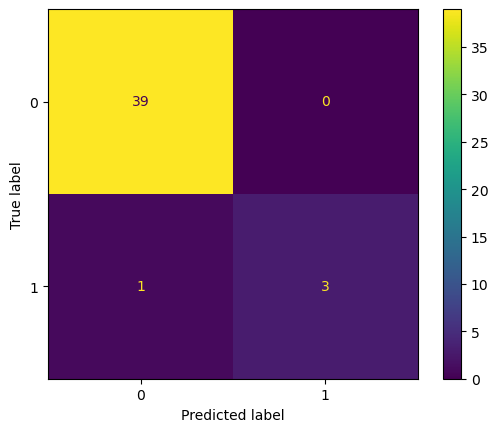

In [188]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.75      0.86         4

    accuracy                           0.98        43
   macro avg       0.99      0.88      0.92        43
weighted avg       0.98      0.98      0.98        43

